In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:

df=pd.read_csv(r"C:\Users\Aditya\Desktop\pregnancy risk prediction data set.csv",encoding='latin1')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6103 entries, 0 to 6102
Data columns (total 11 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Patient ID                         6103 non-null   int64  
 1   Name                               6103 non-null   object 
 2   Age                                6103 non-null   int64  
 3   Body Temperature(F)                6103 non-null   float64
 4   Heart rate(bpm)                    6103 non-null   int64  
 5   Systolic Blood Pressure(mm Hg)     6103 non-null   int64  
 6   Diastolic Blood Pressure(mm Hg)    6103 non-null   int64  
 7   BMI(kg/m 2)                        6103 non-null   float64
 8   Blood Glucose(HbA1c)               6103 non-null   int64  
 9   Blood Glucose(Fasting hour-mg/dl)  6103 non-null   float64
 10  Outcome                            6103 non-null   object 
dtypes: float64(3), int64(6), object(2)
memory usage: 524.6+ 

In [7]:
df.head()

,Patient ID,Name,Age,Body Temperature(F),Heart rate(bpm),Systolic Blood Pressure(mm Hg),Diastolic Blood Pressure(mm Hg),BMI(kg/m 2),Blood Glucose(HbA1c),Blood Glucose(Fasting hour-mg/dl),Outcome
0,1994601,Moulya,20,97.5,91,161,100,24.9,41,5.8,high risk
1,2001562,Soni,45,97.7,99,99,94,22.1,36,5.7,high risk
2,2002530,Baishali,29,98.6,84,129,87,19.0,42,6.4,mid risk
3,2002114,Abhilasha,26,99.5,135,161,101,23.7,46,4.5,high risk
4,2002058,Aanaya,38,102.5,51,106,91,18.8,38,4.3,high risk


In [9]:
df.tail()

,Patient ID,Name,Age,Body Temperature(F),Heart rate(bpm),Systolic Blood Pressure(mm Hg),Diastolic Blood Pressure(mm Hg),BMI(kg/m 2),Blood Glucose(HbA1c),Blood Glucose(Fasting hour-mg/dl),Outcome
6098,2002617,Pragalya,24,96.0,101,142,97,20.3,39,6.7,mid risk
6099,2003332,Jyoshita,38,96.0,59,129,94,20.0,39,7.0,high risk
6100,2012649,Mrimnayi,40,103.3,145,123,95,24.6,36,5.0,high risk
6101,2010533,Vardhani,21,99.0,130,152,99,23.2,47,6.6,high risk
6102,2002215,Nivashni,29,98.6,84,136,80,24.9,38,4.5,low risk


In [74]:
missing_values=df.isnull().sum()
print(missing_values)

Patient ID                           0
Name                                 0
Age                                  0
Body Temperature(F)                  0
Heart rate(bpm)                      0
Systolic Blood Pressure(mm Hg)       0
Diastolic Blood Pressure(mm Hg)      0
BMI(kg/m 2)                          0
Blood Glucose(HbA1c)                 0
Blood Glucose(Fasting hour-mg/dl)    0
Outcome                              0
dtype: int64


In [11]:
df=df.drop(columns=['Patient ID','Name'])

In [13]:
df['Outcome']=df['Outcome'].map({'high risk':2,'mid risk':1,'low risk':0})

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6103 entries, 0 to 6102
Data columns (total 9 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                6103 non-null   int64  
 1   Body Temperature(F)                6103 non-null   float64
 2   Heart rate(bpm)                    6103 non-null   int64  
 3   Systolic Blood Pressure(mm Hg)     6103 non-null   int64  
 4   Diastolic Blood Pressure(mm Hg)    6103 non-null   int64  
 5   BMI(kg/m 2)                        6103 non-null   float64
 6   Blood Glucose(HbA1c)               6103 non-null   int64  
 7   Blood Glucose(Fasting hour-mg/dl)  6103 non-null   float64
 8   Outcome                            6103 non-null   int64  
dtypes: float64(3), int64(6)
memory usage: 429.2 KB


In [17]:
df.head()

,Age,Body Temperature(F),Heart rate(bpm),Systolic Blood Pressure(mm Hg),Diastolic Blood Pressure(mm Hg),BMI(kg/m 2),Blood Glucose(HbA1c),Blood Glucose(Fasting hour-mg/dl),Outcome
0,20,97.5,91,161,100,24.9,41,5.8,2
1,45,97.7,99,99,94,22.1,36,5.7,2
2,29,98.6,84,129,87,19.0,42,6.4,1
3,26,99.5,135,161,101,23.7,46,4.5,2
4,38,102.5,51,106,91,18.8,38,4.3,2


In [19]:
numerical_column=(['Age', 'Body Temperature(F) ', 'Heart rate(bpm)',
       'Systolic Blood Pressure(mm Hg)', 'Diastolic Blood Pressure(mm Hg)',
       'BMI(kg/m 2)', 'Blood Glucose(HbA1c)',
       'Blood Glucose(Fasting hour-mg/dl)', 'Outcome'])



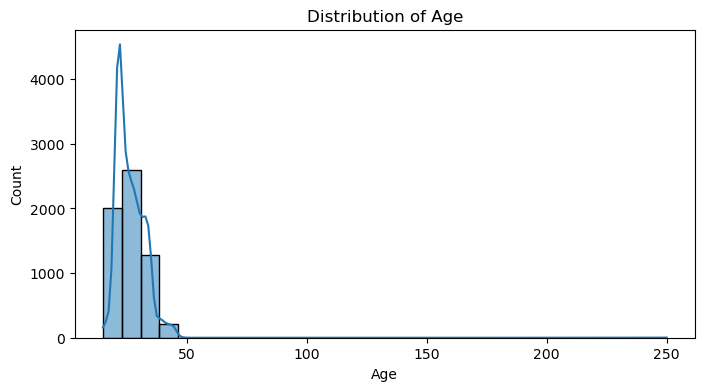

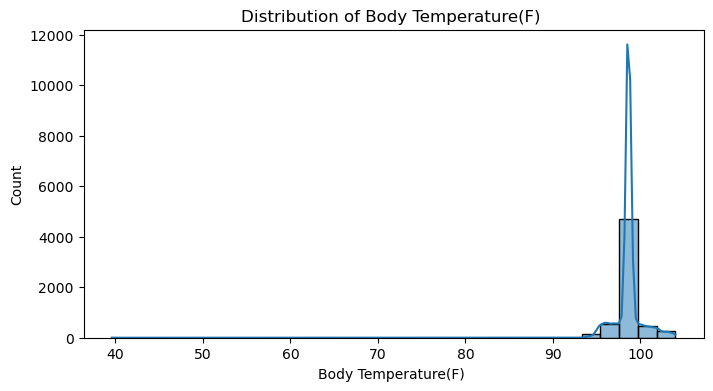

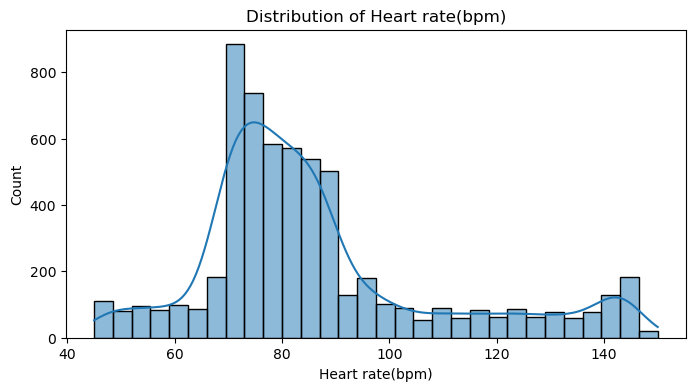

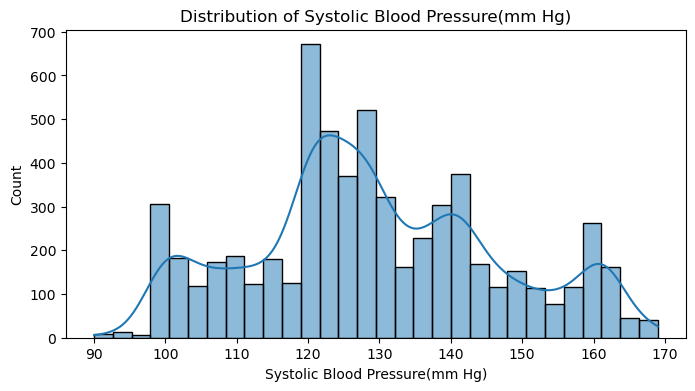

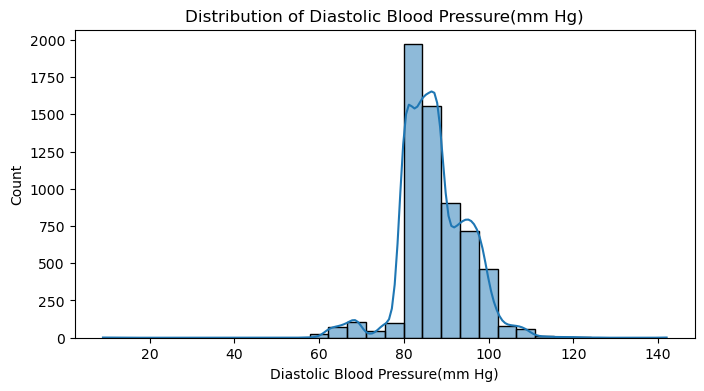

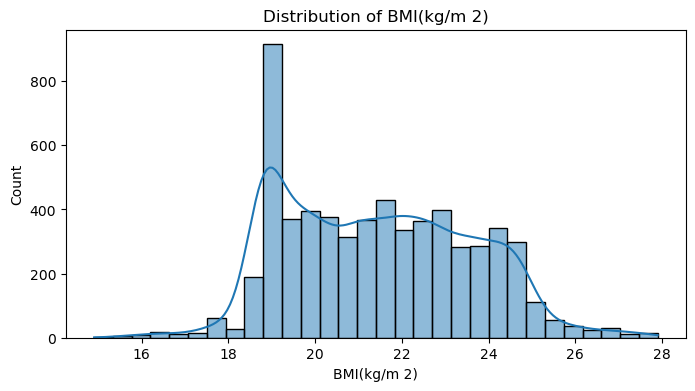

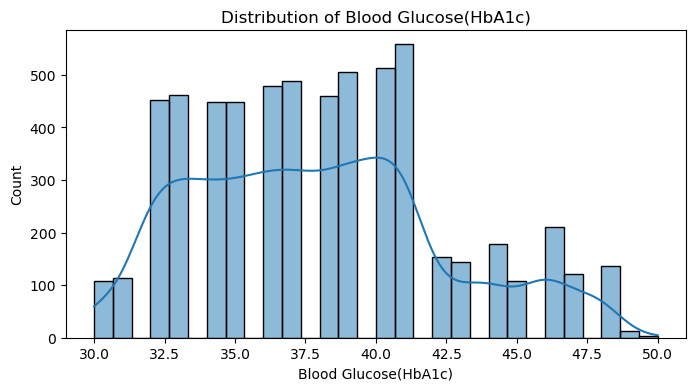

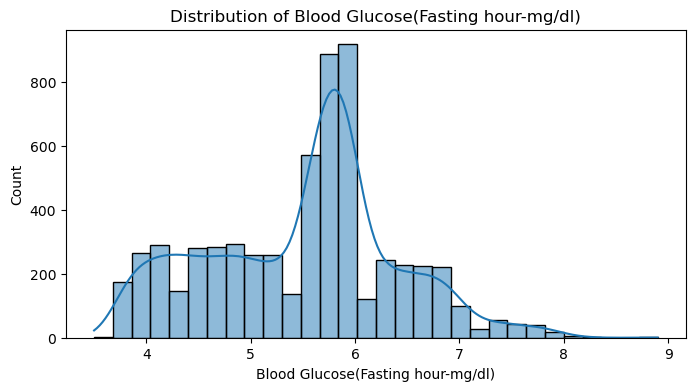

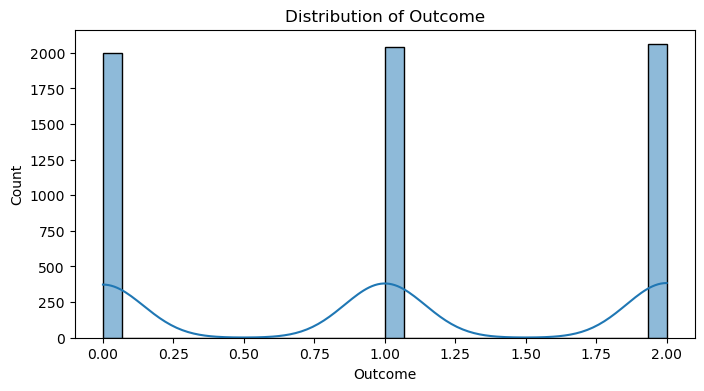

In [12]:
for column in numerical_column:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[column],kde=True, bins=30)
    plt.title(f'Distribution of {column}')
    plt.show()

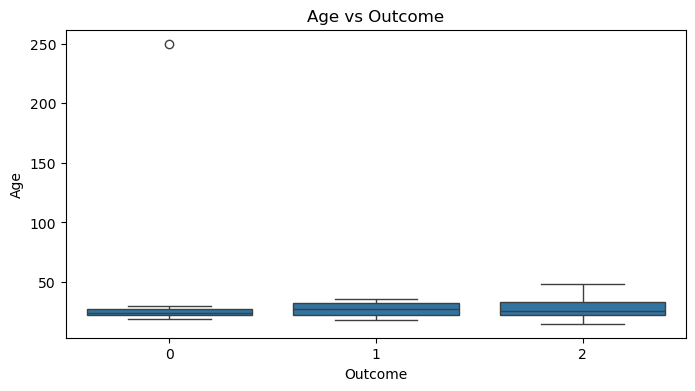

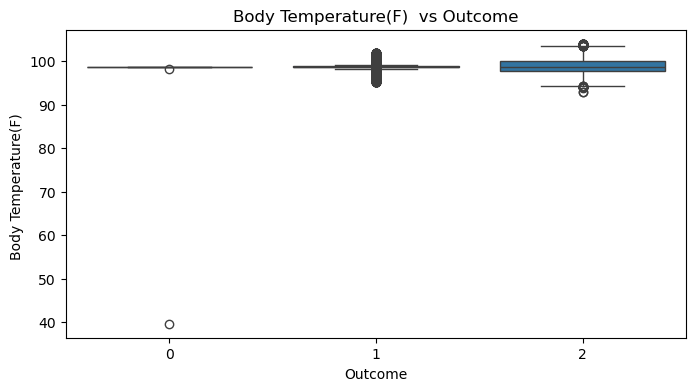

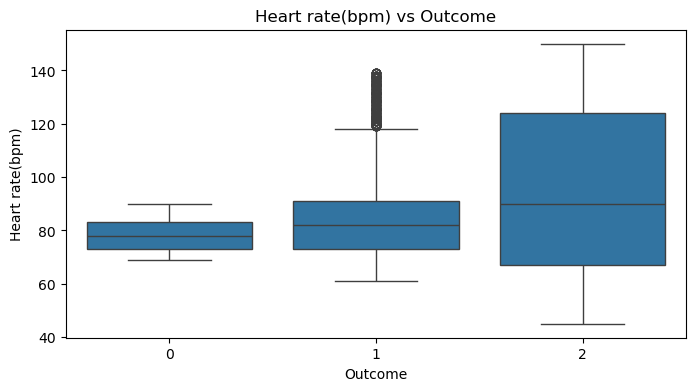

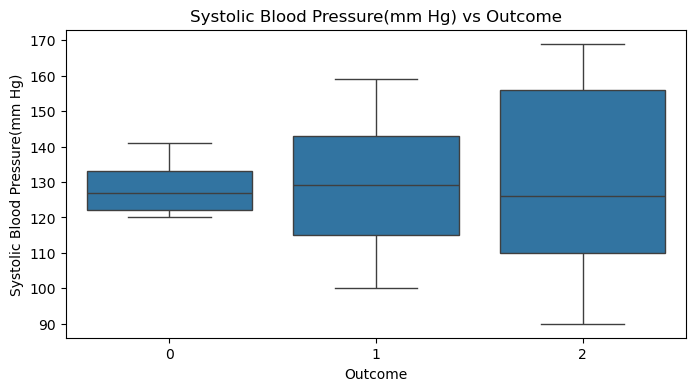

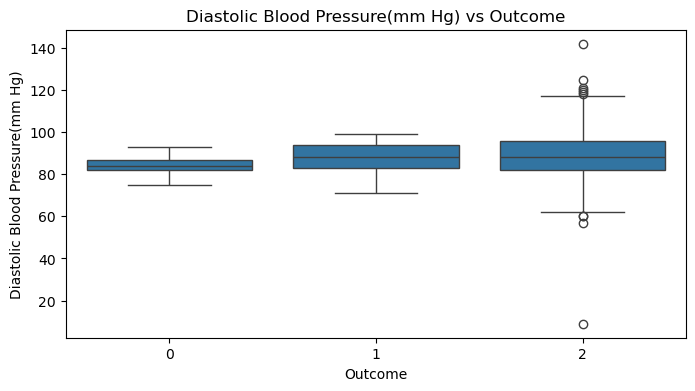

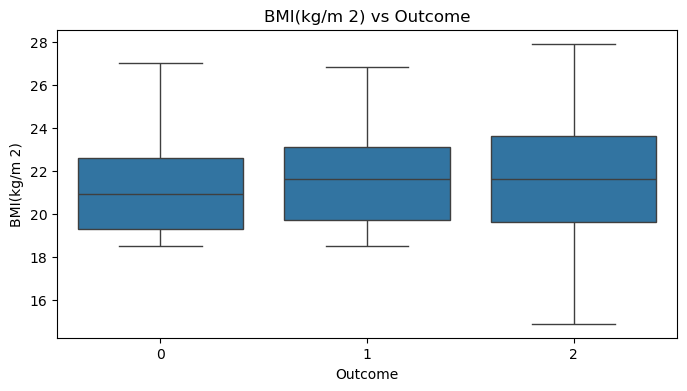

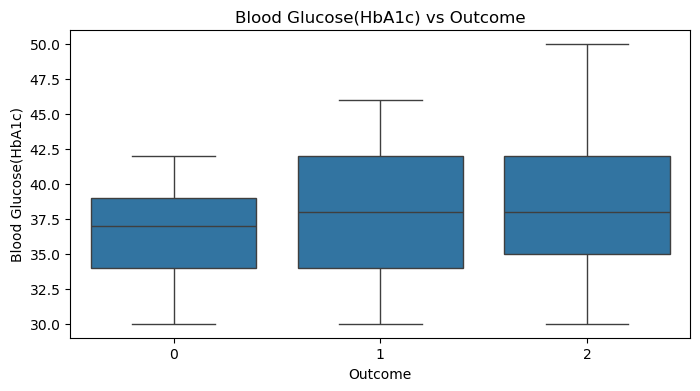

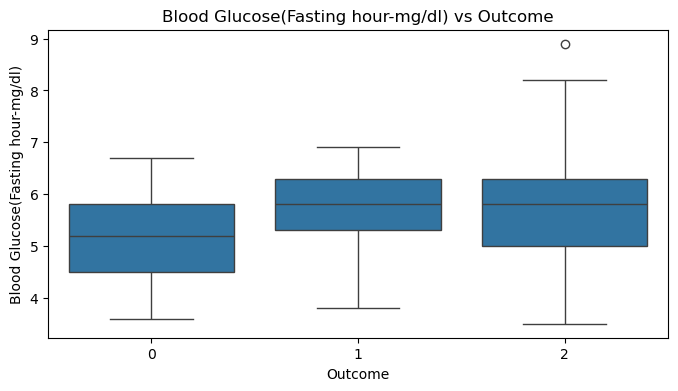

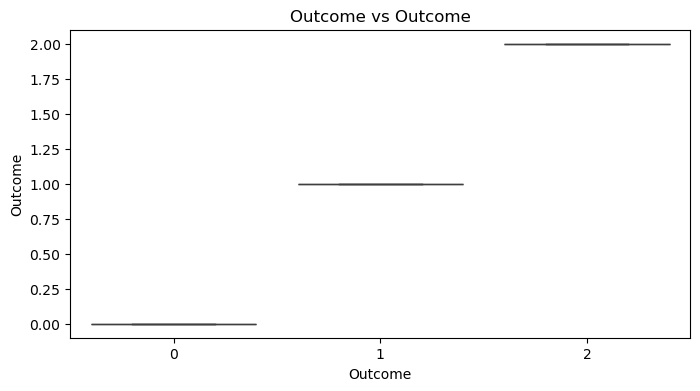

In [75]:
for column in numerical_column:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x='Outcome', y=column, data=df)
    plt.title(f'{column} vs Outcome')
    plt.show()

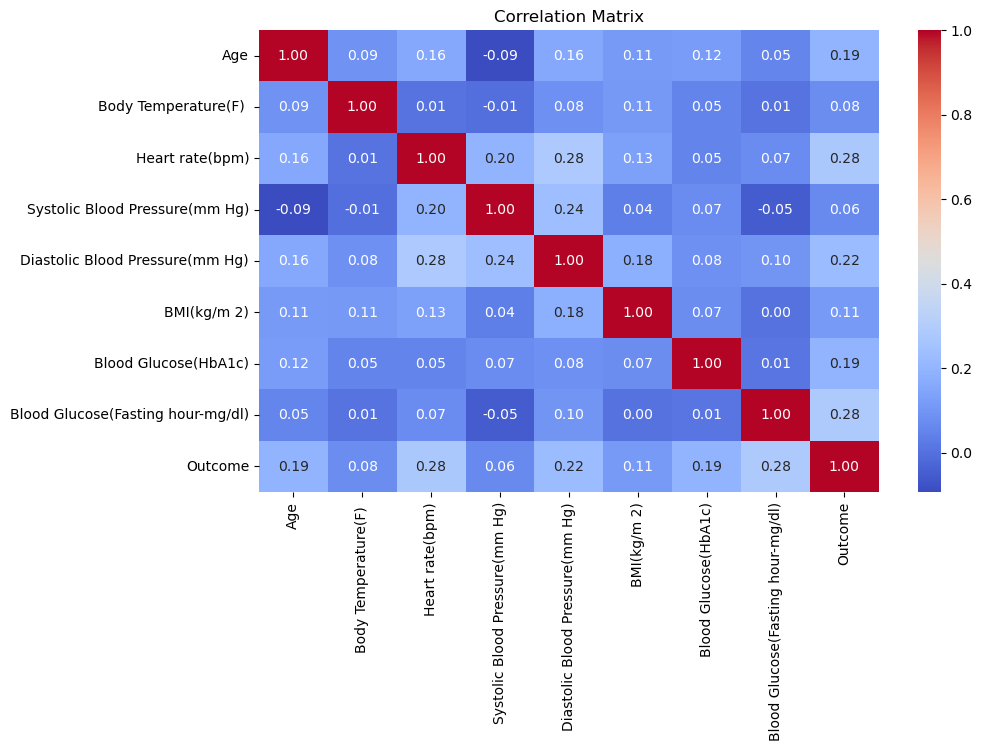

In [76]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


In [21]:
numerical_column=(['Age', 'Body Temperature(F) ', 'Heart rate(bpm)',
       'Systolic Blood Pressure(mm Hg)', 'Diastolic Blood Pressure(mm Hg)',
       'BMI(kg/m 2)', 'Blood Glucose(HbA1c)',
       'Blood Glucose(Fasting hour-mg/dl)', 'Outcome'])




def outlier_detection(df,column):
    
    Q1=df[column].quantile(0.25)
    Q3=df[column].quantile(0.75)
    IQR=Q3-Q1

    lower_bound=Q1-1.5*IQR
    upper_bound=Q3+1.5*IQR

    outlier=df[(df[column]<lower_bound) | (df[column]>upper_bound)]
    return outlier

for column in numerical_column:
    
    outlier=outlier_detection(df,column)
    print("The outlier in {column}")
    print(outlier)
    print(f"Number of outlier in {column}: {outlier.shape[0]}\n")

The outlier in {column}
      Age  Body Temperature(F)   Heart rate(bpm)  \
1      45                  97.7               99   
121    43                  97.9              120   
134   250                  98.6               76   
267    44                  97.6              145   
372    45                 102.1               49   
...   ...                   ...              ...   
5864   44                  98.0              121   
5934   45                  97.7              141   
5957   44                  96.4              144   
6034   43                  99.6              136   
6039   44                 103.1               57   

      Systolic Blood Pressure(mm Hg)  Diastolic Blood Pressure(mm Hg)  \
1                                 99                               94   
121                              116                               98   
134                              126                               85   
267                              120                       

In [16]:
age_column = df['Age']

# Calculate the Z-scores for the 'Age' column
z_scores = (age_column - age_column.mean()) / age_column.std()

# Identify outliers (Z-score > 3 or Z-score < -3)
outliers = df[np.abs(z_scores) > 5]

print("Number of outliers:", len(outliers))
print(outliers)

Number of outliers: 1
     Age  Body Temperature(F)   Heart rate(bpm)  \
134  250                  98.6               76   

     Systolic Blood Pressure(mm Hg)  Diastolic Blood Pressure(mm Hg)  \
134                             126                               85   

     BMI(kg/m 2)  Blood Glucose(HbA1c)  Blood Glucose(Fasting hour-mg/dl)  \
134         24.1                    42                                5.9   

     Outcome  
134        0  


In [68]:
import pandas as pd

# Assuming your dataframe is 'df' and the column to check is 'blood_pressure'

# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df['Body Temperature(F) '].quantile(0.25)
Q3 = df['Body Temperature(F) '].quantile(0.75)

# Calculate the IQR
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find the outliers
outliers = df[(df['Body Temperature(F) '] < lower_bound) | (df['Body Temperature(F) '] > upper_bound)]

# Print outliers (if any)
print(outliers)


      Age  Body Temperature(F)   Heart rate(bpm)  \
0      20                  97.5               91   
1      45                  97.7               99   
3      26                  99.5              135   
4      38                 102.5               51   
7      38                 101.1              141   
...   ...                   ...              ...   
6093   25                 102.9               48   
6097   28                 101.3               76   
6098   24                  96.0              101   
6099   38                  96.0               59   
6100   40                 103.3              145   

      Systolic Blood Pressure(mm Hg)  Diastolic Blood Pressure(mm Hg)  \
0                                161                              100   
1                                 99                               94   
3                                161                              101   
4                                106                               91   
7         

In [18]:
bloodtemp_column=df['Body Temperature(F) ']
z_score = (bloodtemp_column-bloodtemp_column.mean())/bloodtemp_column.std()
outliers = df[np.abs(z_score) > 3]
print("Number of outliers:", len(outliers))
print(outliers)



Number of outliers: 61
      Age  Body Temperature(F)   Heart rate(bpm)  \
8      42                 103.5              144   
22     22                 104.0               99   
65     36                 103.6               55   
157    37                 103.7               56   
319    42                 103.7              143   
...   ...                   ...              ...   
5715   44                 103.7               55   
5854   19                 104.0               96   
5862   25                 103.6               89   
5955   31                 103.9               54   
6074   33                 103.5               46   

      Systolic Blood Pressure(mm Hg)  Diastolic Blood Pressure(mm Hg)  \
8                                124                               83   
22                               161                              106   
65                               105                               96   
157                              106                        

In [23]:
df=df[df['Age']!=250]

In [25]:
df=df[df['Body Temperature(F) ']!=39.6]

In [86]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 6101 entries, 0 to 6102
Data columns (total 9 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                6101 non-null   int64  
 1   Body Temperature(F)                6101 non-null   float64
 2   Heart rate(bpm)                    6101 non-null   int64  
 3   Systolic Blood Pressure(mm Hg)     6101 non-null   int64  
 4   Diastolic Blood Pressure(mm Hg)    6101 non-null   int64  
 5   BMI(kg/m 2)                        6101 non-null   float64
 6   Blood Glucose(HbA1c)               6101 non-null   int64  
 7   Blood Glucose(Fasting hour-mg/dl)  6101 non-null   float64
 8   Outcome                            6101 non-null   int64  
dtypes: float64(3), int64(6)
memory usage: 476.6 KB


In [27]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report



# Select features and target
numerical_columns = ['Age', 'Body Temperature(F) ', 'Heart rate(bpm)', 'Systolic Blood Pressure(mm Hg)', 
                     'Diastolic Blood Pressure(mm Hg)', 'BMI(kg/m 2)', 'Blood Glucose(HbA1c)', 
                     'Blood Glucose(Fasting hour-mg/dl)']
X = df[numerical_columns]
y = df['Outcome']  # Adjust the target column name if needed

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train logistic regression model
log_reg = LogisticRegression(max_iter=200, random_state=42)
log_reg.fit(X_train_scaled, y_train)

# Make predictions
y_pred = log_reg.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted', zero_division=1)
recall = recall_score(y_test, y_pred, average='weighted', zero_division=1)
f1 = f1_score(y_test, y_pred, average='weighted', zero_division=1)
classification_rep = classification_report(y_test, y_pred, zero_division=1)

# Print the evaluation metrics
print("Logistic Regression Performance:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print("Classification Report:\n", classification_rep)




Logistic Regression Performance:
Accuracy: 0.5569
Precision: 0.5535
Recall: 0.5569
F1 Score: 0.5509
Classification Report:
               precision    recall  f1-score   support

           0       0.58      0.72      0.65       399
           1       0.54      0.51      0.52       425
           2       0.54      0.44      0.48       397

    accuracy                           0.56      1221
   macro avg       0.55      0.56      0.55      1221
weighted avg       0.55      0.56      0.55      1221



In [29]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report



# Select features and target
numerical_columns = ['Age', 'Body Temperature(F) ', 'Heart rate(bpm)', 'Systolic Blood Pressure(mm Hg)', 
                     'Diastolic Blood Pressure(mm Hg)', 'BMI(kg/m 2)', 'Blood Glucose(HbA1c)', 
                     'Blood Glucose(Fasting hour-mg/dl)']
X = df[numerical_columns]
y = df['Outcome']  # Adjust the target column name if needed

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the random forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = rf_model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted', zero_division=1)
recall = recall_score(y_test, y_pred, average='weighted', zero_division=1)
f1 = f1_score(y_test, y_pred, average='weighted', zero_division=1)
classification_rep = classification_report(y_test, y_pred, zero_division=1)

# Print the evaluation metrics
print("Random Forest Performance:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print("Classification Report:\n", classification_rep)


Random Forest Performance:
Accuracy: 0.9894
Precision: 0.9894
Recall: 0.9894
F1 Score: 0.9894
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       399
           1       0.98      0.99      0.99       425
           2       0.99      0.98      0.99       397

    accuracy                           0.99      1221
   macro avg       0.99      0.99      0.99      1221
weighted avg       0.99      0.99      0.99      1221



In [29]:
#Feature importance


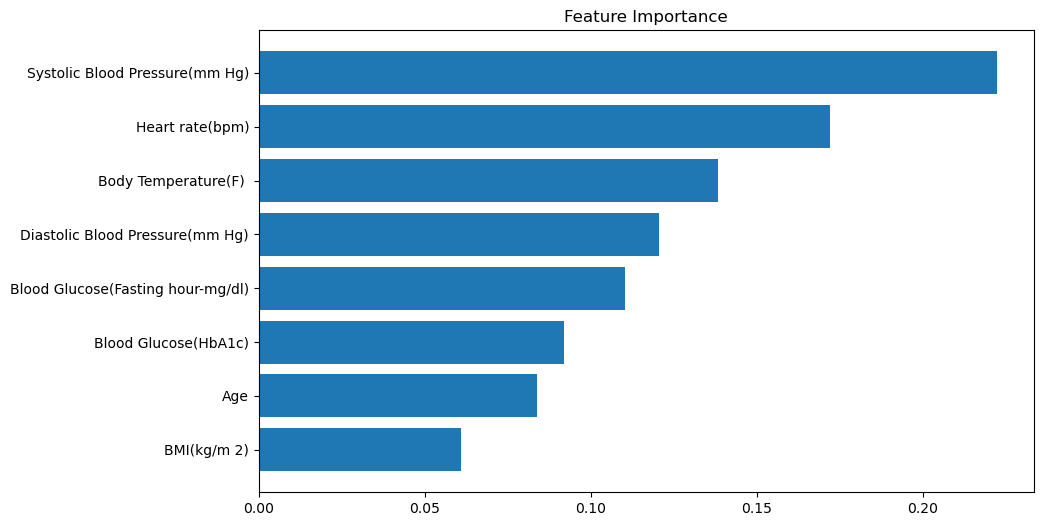

In [25]:
import matplotlib.pyplot as plt
import numpy as np

# Feature Importance
feature_importance = rf_model.feature_importances_
sorted_idx = np.argsort(feature_importance)
plt.figure(figsize=(10, 6))
plt.barh([numerical_columns[i] for i in sorted_idx], feature_importance[sorted_idx])
plt.title('Feature Importance')
plt.show()

In [33]:
#confusion matrix

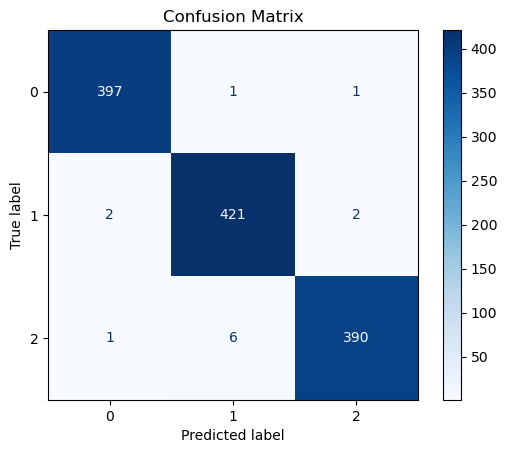

In [31]:
from sklearn.metrics import ConfusionMatrixDisplay

# Plot confusion matrix
ConfusionMatrixDisplay.from_estimator(rf_model, X_test_scaled, y_test, cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

In [37]:
#hypertuning

In [33]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform grid search
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=3, scoring='f1_weighted')
grid_search.fit(X_train_scaled, y_train)

# Retrieve the optimized model
optimized_model = grid_search.best_estimator_

# Save the model for future use
import joblib
joblib.dump(optimized_model, 'optimized_rf_model.pkl')
joblib.dump(scaler, 'scaler.pkl')

print("Optimized model and scaler saved successfully!")


Optimized model and scaler saved successfully!


In [41]:
#Evaluating optimized model

In [37]:
# Make predictions with the optimized model
y_pred_optimized = optimized_model.predict(X_test_scaled)

# Evaluate performance
from sklearn.metrics import accuracy_score, classification_report

print("Optimized Model Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_optimized):.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred_optimized))


Optimized Model Performance:
Accuracy: 0.9910
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       399
           1       0.99      0.99      0.99       425
           2       0.99      0.99      0.99       397

    accuracy                           0.99      1221
   macro avg       0.99      0.99      0.99      1221
weighted avg       0.99      0.99      0.99      1221



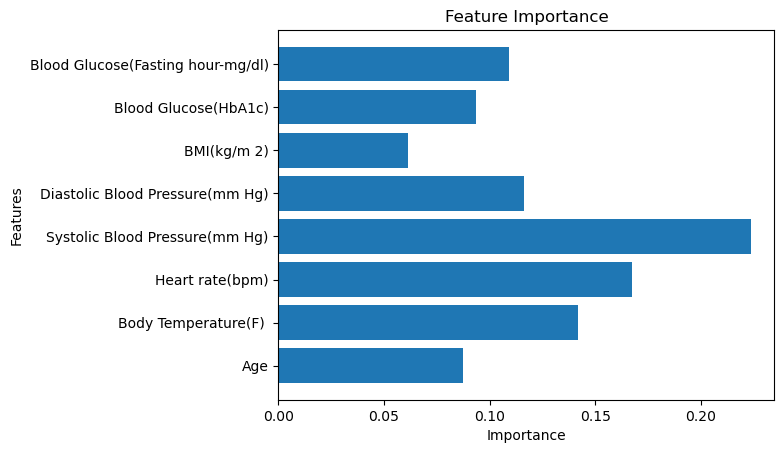

In [39]:
import matplotlib.pyplot as plt
feature_importances = optimized_model.feature_importances_
features = X.columns
plt.barh(features, feature_importances)
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Feature Importance')
plt.show()

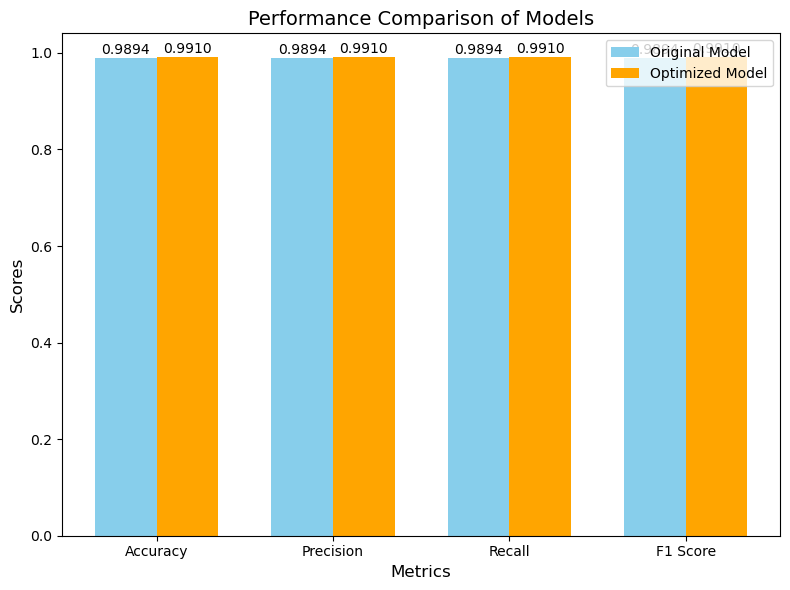

In [41]:
import matplotlib.pyplot as plt
import numpy as np

# Performance metrics for original and optimized models
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
original_model_scores = [0.9894, 0.9894, 0.9894, 0.9894]  # Replace with original scores
optimized_model_scores = [0.9910, 0.9910, 0.9910, 0.9910]  # Replace with optimized scores

# Create a bar plot for comparison
x = np.arange(len(metrics))
width = 0.35

fig, ax = plt.subplots(figsize=(8, 6))
bar1 = ax.bar(x - width/2, original_model_scores, width, label='Original Model', color='skyblue')
bar2 = ax.bar(x + width/2, optimized_model_scores, width, label='Optimized Model', color='orange')

# Add labels, title, and legend
ax.set_xlabel('Metrics', fontsize=12)
ax.set_ylabel('Scores', fontsize=12)
ax.set_title('Performance Comparison of Models', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(metrics, fontsize=10)
ax.legend()

# Annotate the bars with exact values
for bars in [bar1, bar2]:
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.4f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3), textcoords="offset points", ha='center', fontsize=10)

plt.tight_layout()
plt.show()


In [43]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score
import numpy as np

# Stratified K-Fold for better balance in target class distribution
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Lists to store metrics for each fold
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

# Perform Stratified K-Fold Cross-Validation
for train_index, val_index in kf.split(X_train_scaled, y_train):
    # Split the data
    X_train_fold, X_val_fold = X_train_scaled[train_index], X_train_scaled[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

    # Train the model
    optimized_model.fit(X_train_fold, y_train_fold)

    # Make predictions
    y_val_pred = optimized_model.predict(X_val_fold)

    # Calculate metrics for this fold
    accuracy_scores.append(accuracy_score(y_val_fold, y_val_pred))
    precision_scores.append(precision_score(y_val_fold, y_val_pred, average='weighted'))
    recall_scores.append(recall_score(y_val_fold, y_val_pred, average='weighted'))
    f1_scores.append(f1_score(y_val_fold, y_val_pred, average='weighted'))

# Print the average metrics across all folds
print("Cross-Validation Results:")
print(f"Accuracy: {np.mean(accuracy_scores):.4f} ± {np.std(accuracy_scores):.4f}")
print(f"Precision: {np.mean(precision_scores):.4f} ± {np.std(precision_scores):.4f}")
print(f"Recall: {np.mean(recall_scores):.4f} ± {np.std(recall_scores):.4f}")
print(f"F1 Score: {np.mean(f1_scores):.4f} ± {np.std(f1_scores):.4f}")

# Final evaluation on the test set
y_test_pred = optimized_model.predict(X_test_scaled)

# Test set performance metrics
print("\nTest Set Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_test_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_test_pred, average='weighted'):.4f}")
print(f"Recall: {recall_score(y_test, y_test_pred, average='weighted'):.4f}")
print(f"F1 Score: {f1_score(y_test, y_test_pred, average='weighted'):.4f}")
print("\nClassification Report on Test Set:")
print(classification_report(y_test, y_test_pred))

# Confusion Matrix for Test Set
conf_matrix = confusion_matrix(y_test, y_test_pred)
print("\nConfusion Matrix:\n", conf_matrix)


Cross-Validation Results:
Accuracy: 0.9906 ± 0.0041
Precision: 0.9907 ± 0.0041
Recall: 0.9906 ± 0.0041
F1 Score: 0.9906 ± 0.0041

Test Set Performance:
Accuracy: 0.9885
Precision: 0.9886
Recall: 0.9885
F1 Score: 0.9885

Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       399
           1       0.98      0.99      0.99       425
           2       0.99      0.98      0.99       397

    accuracy                           0.99      1221
   macro avg       0.99      0.99      0.99      1221
weighted avg       0.99      0.99      0.99      1221


Confusion Matrix:
 [[397   1   1]
 [  2 421   2]
 [  2   6 389]]


In [45]:
import pandas as pd
import joblib

# Load the saved model and scaler
model = joblib.load('optimized_rf_model.pkl')  # Ensure this file exists
scaler = joblib.load('scaler.pkl')  # Ensure this file exists

# Function to predict pregnancy risk for new data
def predict_pregnancy_risk(new_data):
    """
    Predict pregnancy risk for new patient data.
    
    Args:
        new_data (pd.DataFrame): A DataFrame containing new patient records.
        
    Returns:
        pd.DataFrame: A DataFrame with predictions and probabilities.
    """
    # Scale the new data
    new_data_scaled = scaler.transform(new_data)

    # Make predictions
    predictions = model.predict(new_data_scaled)
    probabilities = model.predict_proba(new_data_scaled)

    # Combine predictions and probabilities into a DataFrame
    results = new_data.copy()
    results['Predicted Risk Level'] = predictions
    results['Low Risk Probability'] = probabilities[:, 0]
    results['Medium Risk Probability'] = probabilities[:, 1]
    results['High Risk Probability'] = probabilities[:, 2]

    return results

# Example new data for prediction
new_data = pd.DataFrame({
    'Age': [28, 34],
    'Body Temperature(F) ': [98.5, 99.1],
    'Heart rate(bpm)': [85, 78],
    'Systolic Blood Pressure(mm Hg)': [125, 140],
    'Diastolic Blood Pressure(mm Hg)': [80, 85],
    'BMI(kg/m 2)': [24.5, 28.7],
    'Blood Glucose(HbA1c)': [5.4, 6.1],
    'Blood Glucose(Fasting hour-mg/dl)': [95, 110]
})

# Predict risk levels for new data
results = predict_pregnancy_risk(new_data)

# Display the predictions
print("Predictions for New Data:")
print(results)

Predictions for New Data:
   Age  Body Temperature(F)   Heart rate(bpm)  Systolic Blood Pressure(mm Hg)  \
0   28                  98.5               85                             125   
1   34                  99.1               78                             140   

   Diastolic Blood Pressure(mm Hg)  BMI(kg/m 2)  Blood Glucose(HbA1c)  \
0                               80         24.5                   5.4   
1                               85         28.7                   6.1   

   Blood Glucose(Fasting hour-mg/dl)  Predicted Risk Level  \
0                                 95                     2   
1                                110                     2   

   Low Risk Probability  Medium Risk Probability  High Risk Probability  
0                 0.035                    0.190                  0.775  
1                 0.000                    0.195                  0.805  
